Import Libraries 

In [38]:
import numpy as np 
import pandas as pd 
import glob 
import matplotlib.pyplot as plt 


Read & Pre-process dataset

In [39]:
dataset=pd.read_csv('NNDL_finaldataset.csv')
dataset.head()

,1,2,3,4,5,6,7,8,9,10,...,sy,sz,lwx,lwy,lwz,rwx,rwy,rwz,timestamp,phase
0,-0.005009,-0.000964,0.000573,0.008623,0.005667,0.001302,-0.000631,0.000130,-0.000048,0.007762,...,4.229656,1.772577,4.972902,4.301065,1.564781,5.553945,4.370456,1.553521,5702026,D
1,0.004905,0.001209,-0.000649,0.004737,0.003166,0.000819,-0.000572,-0.000015,0.000023,0.002706,...,4.228504,1.772859,4.974908,4.303656,1.565527,5.423875,4.303708,1.569942,5702058,D
2,-0.002393,-0.000216,0.000136,0.003028,0.001212,0.000336,-0.000449,0.000017,0.000047,0.002868,...,4.228004,1.773568,4.981612,4.305363,1.563643,5.332170,4.438061,1.572841,5702089,D
3,-0.001394,-0.000242,0.000056,0.001182,0.000575,0.000225,-0.000479,-0.000050,0.000104,0.001171,...,4.226891,1.774519,4.987158,4.304063,1.565929,5.311104,4.396774,1.566368,5702120,D
4,-0.000156,-0.000004,0.000023,0.001585,0.000630,0.000094,-0.000303,0.000097,0.000065,0.001579,...,4.225485,1.775536,4.983912,4.296833,1.569889,5.193762,4.335417,1.560144,5702167,D


In [40]:
len(dataset)

9873

In [41]:
dataset.shape

(9873, 52)

In [42]:
dataset.isnull().values.any()

False

In [43]:
correlation=dataset.corr()


<AxesSubplot: >

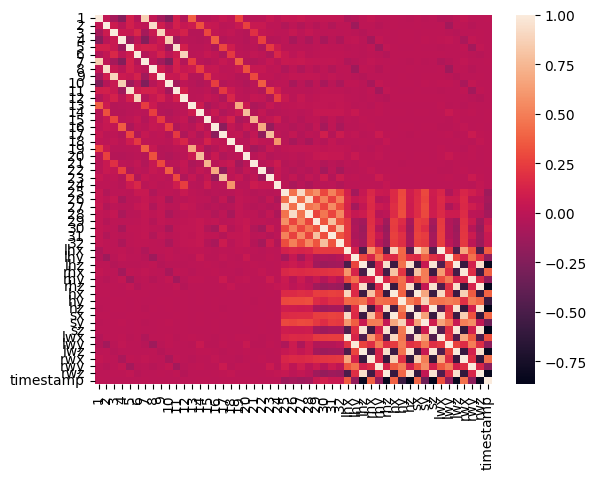

In [44]:
import seaborn as sns
sns.heatmap(correlation,xticklabels=correlation.columns,yticklabels=correlation.columns)

In [45]:
X=dataset.drop(['timestamp','phase'],axis=1)
y=dataset['phase']

In [46]:
X.head()

,1,2,3,4,5,6,7,8,9,10,...,hz,sx,sy,sz,lwx,lwy,lwz,rwx,rwy,rwz
0,-0.005009,-0.000964,0.000573,0.008623,0.005667,0.001302,-0.000631,0.000130,-0.000048,0.007762,...,1.778350,5.062803,4.229656,1.772577,4.972902,4.301065,1.564781,5.553945,4.370456,1.553521
1,0.004905,0.001209,-0.000649,0.004737,0.003166,0.000819,-0.000572,-0.000015,0.000023,0.002706,...,1.778573,5.061430,4.228504,1.772859,4.974908,4.303656,1.565527,5.423875,4.303708,1.569942
2,-0.002393,-0.000216,0.000136,0.003028,0.001212,0.000336,-0.000449,0.000017,0.000047,0.002868,...,1.778774,5.059245,4.228004,1.773568,4.981612,4.305363,1.563643,5.332170,4.438061,1.572841
3,-0.001394,-0.000242,0.000056,0.001182,0.000575,0.000225,-0.000479,-0.000050,0.000104,0.001171,...,1.778855,5.056475,4.226891,1.774519,4.987158,4.304063,1.565929,5.311104,4.396774,1.566368
4,-0.000156,-0.000004,0.000023,0.001585,0.000630,0.000094,-0.000303,0.000097,0.000065,0.001579,...,1.778925,5.052367,4.225485,1.775536,4.983912,4.296833,1.569889,5.193762,4.335417,1.560144


In [47]:
y.head()

0    D
1    D
2    D
3    D
4    D
Name: phase, dtype: object

array([[<AxesSubplot: title={'center': '1'}>,
        <AxesSubplot: title={'center': '2'}>,
        <AxesSubplot: title={'center': '3'}>,
        <AxesSubplot: title={'center': '4'}>,
        <AxesSubplot: title={'center': '5'}>,
        <AxesSubplot: title={'center': '6'}>,
        <AxesSubplot: title={'center': '7'}>],
       [<AxesSubplot: title={'center': '8'}>,
        <AxesSubplot: title={'center': '9'}>,
        <AxesSubplot: title={'center': '10'}>,
        <AxesSubplot: title={'center': '11'}>,
        <AxesSubplot: title={'center': '12'}>,
        <AxesSubplot: title={'center': '13'}>,
        <AxesSubplot: title={'center': '14'}>],
       [<AxesSubplot: title={'center': '15'}>,
        <AxesSubplot: title={'center': '16'}>,
        <AxesSubplot: title={'center': '17'}>,
        <AxesSubplot: title={'center': '18'}>,
        <AxesSubplot: title={'center': '19'}>,
        <AxesSubplot: title={'center': '20'}>,
        <AxesSubplot: title={'center': '21'}>],
       [<AxesSubplo

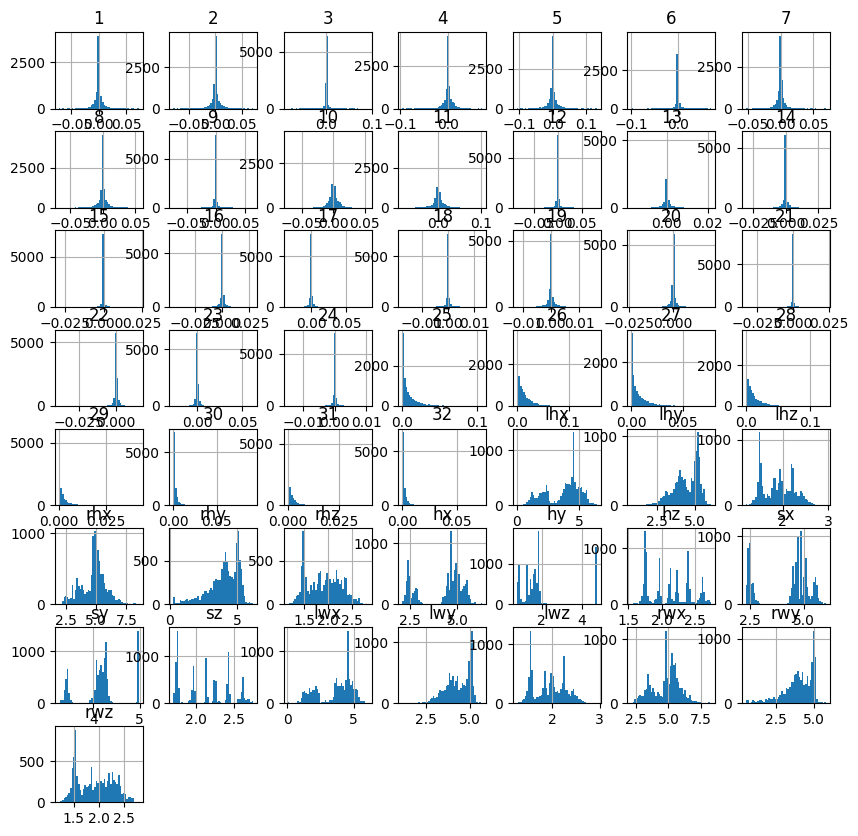

In [49]:
xx=list(X.columns)
X[xx].hist(bins=50,figsize=(10,10))

In [18]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [12]:
std=StandardScaler()


In [51]:
X=std.fit_transform(X)


In [59]:
X.shape

(9873, 50)

In [60]:
from sklearn.decomposition import PCA
pca_analysis=PCA(n_components=2)
X=pca_analysis.fit_transform(X)

In [61]:
x_train, x_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=1234)

In [62]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape


((6911, 2), (2962, 2), (6911,), (2962,))